In [61]:
# Import relevant libraries
import requests
import json
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import random


from config import api_key

In [62]:
# Read in data from CSV to DataFrame
path = "NY-House-Dataset.csv"
housing_df = pd.read_csv(path)

In [63]:
# Clean up data
def checknumeric(txt):
    return txt.isnumeric()
wrong_df = housing_df.loc[(housing_df["ADMINISTRATIVE_AREA_LEVEL_2"].apply(checknumeric)) | (housing_df["PRICE"] > 5000000)]
remove = wrong_df.index
housing_df = housing_df.drop(labels=remove)
housing_df = housing_df.drop(labels=["MAIN_ADDRESS","ADMINISTRATIVE_AREA_LEVEL_2","STREET_NAME","LONG_NAME", "FORMATTED_ADDRESS"], axis = 1)
housing_df.reset_index(inplace=True)
housing_df

,index,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022",New York,Manhattan,40.761255,-73.974483
1,2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
2,3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
3,5,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238",New York,Kings County,40.674363,-73.958725
4,6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027",New York County,New York,40.809448,-73.946777
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075",New York County,New York,40.774350,-73.955879
4445,4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374",New York,Queens County,40.732538,-73.860152
4446,4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011",New York,New York County,40.745882,-74.003398
4447,4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373",Queens County,Queens,40.742770,-73.872752


In [64]:
def plot_lin_regress(x,y,xlabel,ylabel,title,loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,loc,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    file_name = title.replace(" ","_")
    plt.savefig("output/"+file_name)
    return rvalue

In [65]:
# General housing graphs

# Bar graphs of housing prices, rooms, etc.

In [66]:
# Pie chart of house types

R-Squared equals: 0.20102486344432638


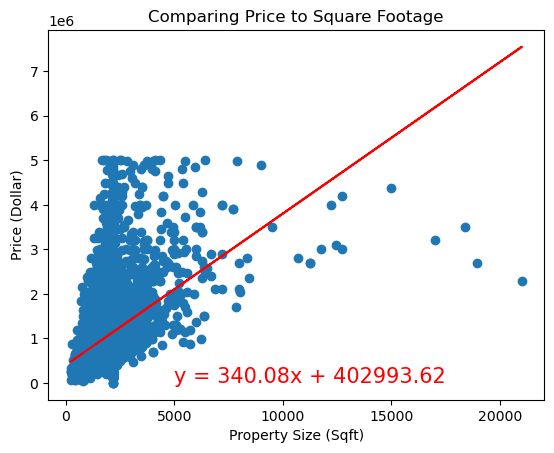

In [72]:
# Scatter plot comparing price to square footage

rvalue = plot_lin_regress(housing_df["PROPERTYSQFT"],housing_df["PRICE"],
                 "PROPERTYSQFT","PRICE","Comparing Price to Square Footage",(5000,0))
print(F"R-Squared equals: {rvalue**2}")

plt.xlabel('Property Size (Sqft)')
plt.ylabel('Price (USD)')
plt.title('Comparing Price to Square Footage')

plt.show()


#include linear regression

In [23]:
# Geoapify graphs 

# Map of co-ops(?)

In [24]:
#Map of houses

In [25]:
#Map of nearby services (color code?)

In [41]:
# Gather data for distance to school vs price

# Set the parameters for the type of search
limit = 20
radius = 1000
category= "education.school"

# set up a parameters dictionary
params = {
    "limit":limit,
    "apiKey":api_key,  
    "categories":category
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

# get sample (change to 100 later)
num_samples = 100
sample_indexes = random.sample(range(0,len(housing_df)),num_samples) 

prices = []
distances = []

print("Getting data. May take a few minutes")

current_count = 1

for index in sample_indexes:
    print(f"Getting nearest school to sample {current_count} of {num_samples}.")
    current_count += 1
    # Set the geographical coordinates
    latitude = housing_df.loc[index, "LATITUDE"]
    longitude = housing_df.loc[index, "LONGITUDE"]

    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params["filters"] = filters
    params["bias"] = bias
    nearby_school = requests.get(base_url, params=params)
    nearby_school = nearby_school.json()

    prices.append(housing_df.loc[index, "PRICE"])
    distances.append(nearby_school["features"][0]["properties"]["distance"])

distance_df = pd.DataFrame({"Price (Dollar)": prices, "Distance to Nearest School (Meters)":distances})
print("Finished getting data.")

Getting data. May take a few minutes
Getting nearest school to sample 1 of 100.
Getting nearest school to sample 2 of 100.
Getting nearest school to sample 3 of 100.
Getting nearest school to sample 4 of 100.
Getting nearest school to sample 5 of 100.
Getting nearest school to sample 6 of 100.
Getting nearest school to sample 7 of 100.
Getting nearest school to sample 8 of 100.
Getting nearest school to sample 9 of 100.
Getting nearest school to sample 10 of 100.
Getting nearest school to sample 11 of 100.
Getting nearest school to sample 12 of 100.
Getting nearest school to sample 13 of 100.
Getting nearest school to sample 14 of 100.
Getting nearest school to sample 15 of 100.
Getting nearest school to sample 16 of 100.
Getting nearest school to sample 17 of 100.
Getting nearest school to sample 18 of 100.
Getting nearest school to sample 19 of 100.
Getting nearest school to sample 20 of 100.
Getting nearest school to sample 21 of 100.
Getting nearest school to sample 22 of 100.
Gett

R-Squared equals: 0.03044812734711744


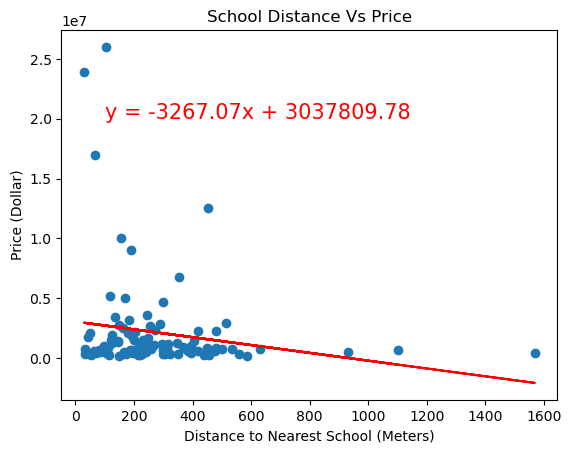

In [42]:
#Scatter plot of data 
rvalue = plot_lin_regress(distance_df["Distance to Nearest School (Meters)"],distance_df["Price (Dollar)"],
                 "Distance to Nearest School (Meters)","Price (Dollar)","School Distance Vs Price",(100,20000000))
print(F"R-Squared equals: {rvalue**2}")
plt.show()

In [39]:
# Analysis Text

In [ ]:
# References